In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def reshuffle(deck, trash):
    random.shuffle(trash)
    if len(deck) == 0:
        deck = trash
    else:
        deck.extend(trash)
    # 捨札の初期化をする処理
    trash = []
    return deck, trash 

In [3]:
def smith(hand, deck, trash):
    if len(deck) <= 3:
        deck, trash = reshuffle(deck, trash)
    else:
        pass
    hand.extend(deck[:3])
    del deck[:3]
    return hand, deck, trash

In [4]:
def purchase_phase(hand, trash, province, s_flag, g_flag):
    money = sum([i for i in hand if str.isdigit(str(i))])
    if money >= 8 and g_flag >= 1:
            trash.insert(0, 0)
            province += 1
    else:
        if money >=6:
            trash.insert(0, 3)
            g_flag += 1
        else:
            if (money ==4 or money == 5) and s_flag ==0:
                trash.insert(0,'s')
                s_flag = 1 # 以降鍛冶屋を買わない
            else:
                if money == 3 or money == 4 or money == 5:
                    trash.insert(0,2)
                else:
                    pass
    return trash, province, s_flag, g_flag

In [5]:
def cleanup_phase(hand, deck, trash):
    trash.extend(hand)
    if len(deck) <=4:
        # デッキの残りと捨札を混ぜて新しいデッキを作成する処理
        deck, trash = reshuffle(deck, trash)
    return deck, trash

In [6]:
def game():
    deck = [1,1,1,1,1,1,1,0,0,0] #デッキの初期化
    trash = [] #捨て札の初期化
    province = 0 #属州の枚数の初期化
    s_flag = 0 # 鍛冶屋フラグの初期化
    g_flag = 0 # 金貨取得枚数の初期化
    turn = 1 # ターン数の初期化：スタート値:1
    random.shuffle(deck) #デッキのシャッフル
    while province <4: #属州を4枚獲得したらストップする
        # 5枚引く動き
        hand = deck[:5].copy()
        # デッキから5枚削除する
        del deck[:5]
        
        # アクションフェーズ：鍛冶屋があれば使用する
        if 's' in hand:
            hand, deck, trash = smith(hand, deck, trash)
        
        # 購入フェイズ           
        trash, province, s_flag, g_flag = purchase_phase(hand, trash, province, s_flag, g_flag)
        
        # 5枚ドローを除いたクリーンアップフェイズ
        deck, trash = cleanup_phase(hand, deck, trash)

        turn += 1 #turn数の追加
    return turn

In [7]:
result = [game() for i in range(2000)]

(array([ 20., 117., 265., 393., 422., 403., 216., 109.,  40.,  15.]),
 array([11. , 12.1, 13.2, 14.3, 15.4, 16.5, 17.6, 18.7, 19.8, 20.9, 22. ]),
 <a list of 10 Patch objects>)

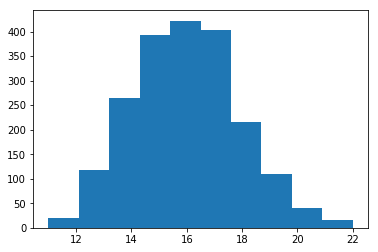

In [8]:
plt.hist(result)